<a href="https://colab.research.google.com/github/Diya-Amith/TimeSeries-CaseStudy-Assignment/blob/main/TimeSeriesCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels --quiet


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from tqdm.notebook import tqdm
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Path
jj_path = ('/content/drive/My Drive/TimeSeries_Assignment/jj.csv')
amzn_path = ('/content/drive/My Drive/TimeSeries_Assignment/AMZN.csv')

## **LOAD DATASETS**

In [4]:
# Read CSV
jj_data = pd.read_csv(jj_path, parse_dates=['date'], index_col='date')
amzn_data = pd.read_csv(amzn_path, parse_dates=['Date'], index_col='Date')

In [63]:
print("Johnsons and Johnsons Data",jj_data.head())
print("Amazon Close Price Data",amzn_data.head())

Johnsons and Johnsons Data             data
date            
1960-01-01  0.71
1960-04-01  0.63
1960-07-02  0.85
1960-10-01  0.44
1961-01-01  0.61
Amazon Close Price Data                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-02-20  72.324501  74.438499  72.324501  73.417503  73.417503  129984000
2018-02-21  74.250000  75.174500  73.945999  74.146004  74.146004  126088000
2018-02-22  74.767998  75.126999  73.788002  74.266998  74.266998   97162000
2018-02-23  74.766998  75.000000  74.324997  75.000000  75.000000   88362000
2018-02-26  75.459999  76.141998  75.349998  76.097504  76.097504   99100000


## **INITIAL PLOTS**

In [64]:
# Plot initial plots
def initial_plots(series, title, ylabel):
    plt.plot(series)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.show()

### **JJ**

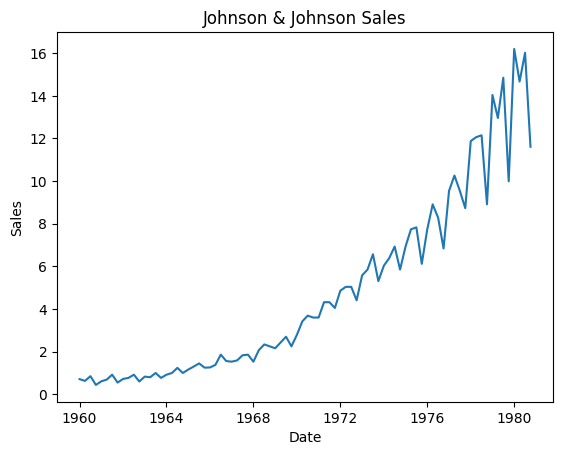

In [65]:
initial_plots(jj_data['data'], "Johnson & Johnson Sales", "Sales")

### **Amazon**

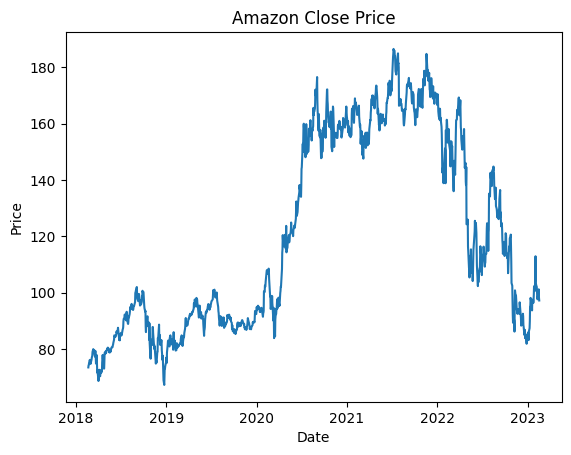

In [66]:
initial_plots(amzn_data['Adj Close'], "Amazon Close Price", "Price")

## **STATIONARY /  NON-STATIONARITY TEST**

### **ACF & PACF Plots**

In [67]:
def plot_acf_pacf(series, lags=30, title=''):
    plt.figure(figsize=(12, 6))

    # ACF and PACF Plots
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF - {title}')

    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF - {title}')

    plt.show()

**JJ**

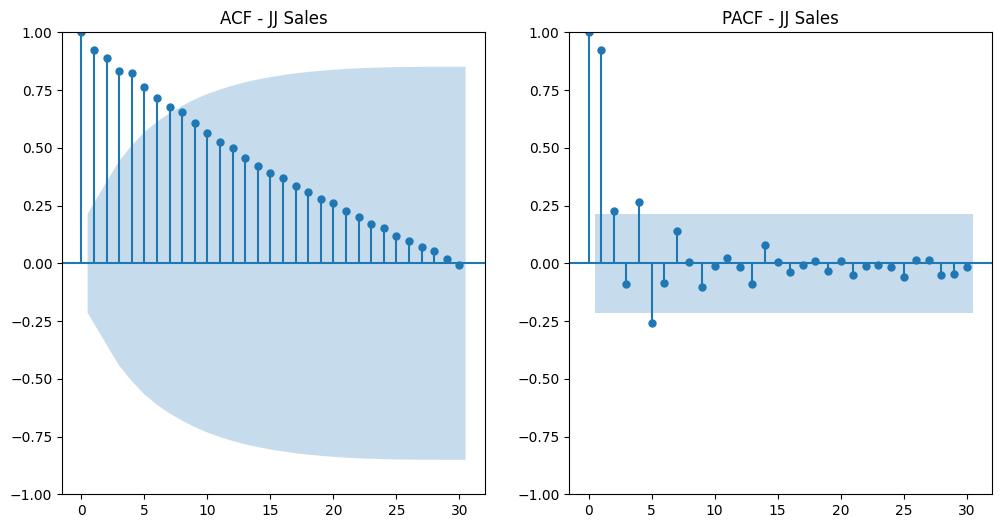

In [68]:
plot_acf_pacf(jj_data['data'], lags=30, title='JJ Sales')

**Amazon**

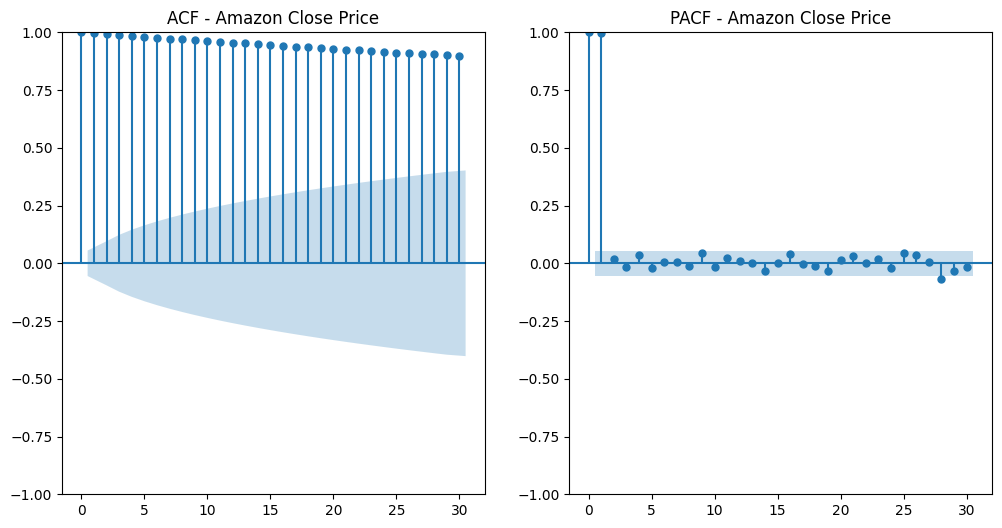

In [69]:
plot_acf_pacf(amzn_data['Adj Close'], lags=30, title='Amazon Close Price')

### **ADF Test**

In [87]:
def adf_test(series, title=''):
    print(f"ADF Test\n{title} ")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("The series is Stationary")
    else:
        print("The series is Non-Stationary")

**JJ**

In [79]:
adf_test(jj_data['data'], "JJ Sales")

ADF Test
JJ Sales 
ADF Statistic: 2.7420
p-value: 1.0000
The series is Non-Stationary


**Amazon**

In [82]:
adf_test(amzn_data['Adj Close'], "Amazon Close Price")

ADF Test
Amazon Close Price 
ADF Statistic: -1.6578
p-value: 0.4530
The series is Non-Stationary


### **Log Transform**

**JJ**

In [83]:
# Log Transform
def log_transform(jj_data):
    jj_data['data_log'] = np.log(jj_data['data'])
    jj_data['data_tr_1'] = jj_data['data_log'].diff()
    jj_data = jj_data.dropna(subset=['data_tr_1'])
    return jj_data

jj_data = log_transform(jj_data)

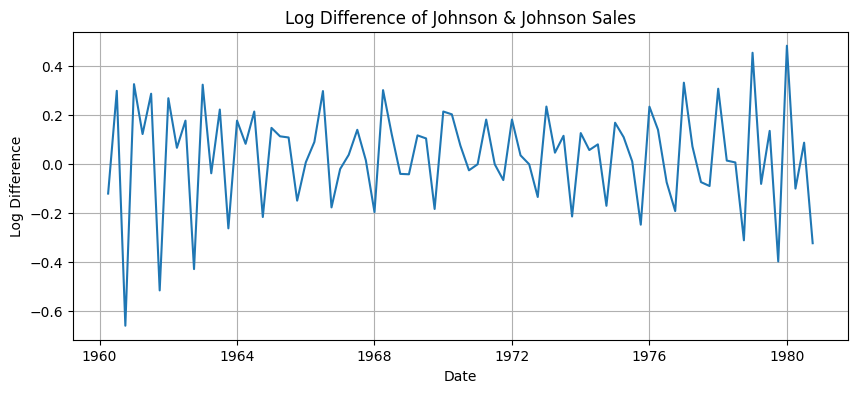

In [84]:
plt.figure(figsize=(10, 4))
plt.plot(jj_data['data_tr_1'])
plt.title("Log Difference of Johnson & Johnson Sales")
plt.xlabel('Date')
plt.ylabel('Log Difference')
plt.grid(True)

**Amazon**

In [85]:
# Log Transform
def log_transform(amzn_data):
    amzn_data['Adj_Close_log'] = np.log(amzn_data['Adj Close'])
    amzn_data['Adj_Close_tr_1'] = amzn_data['Adj_Close_log'].diff()
    amzn_data = amzn_data.dropna(subset=['Adj_Close_tr_1'])
    return amzn_data

amzn_data = log_transform(amzn_data)

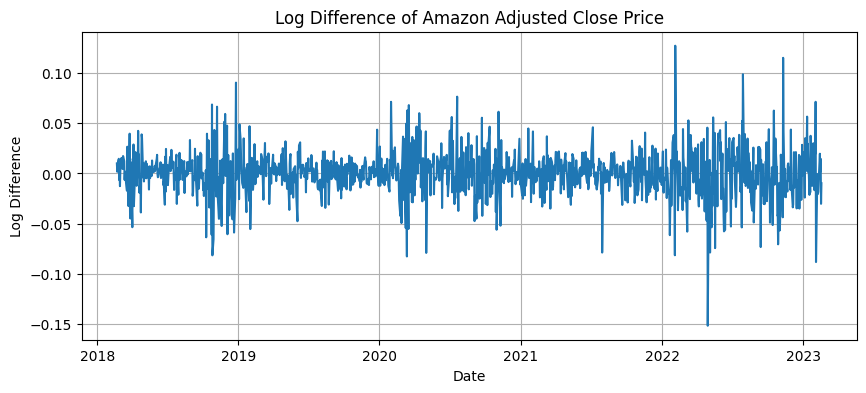

In [86]:
plt.figure(figsize=(10, 4))
plt.plot(amzn_data['Adj_Close_tr_1'])
plt.title("Log Difference of Amazon Adjusted Close Price")
plt.xlabel('Date')
plt.ylabel('Log Difference')
plt.grid(True)
plt.show()

### **Re-Run ADF Test**

In [91]:
def adf_test(data, column_name):
    adf_result = adfuller(data[column_name].dropna())
    print(f"ADF Test: \n{column_name} ---")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    if adf_result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

**JJ**

In [92]:
adf_test(jj_data, 'data_tr_1')

ADF Test: 
data_tr_1 ---
ADF Statistic: -4.317043945811837
p-value: 0.00041497314044406584
Stationary


**Amazon**

In [93]:
adf_test(amzn_data, 'Adj_Close_tr_1')

ADF Test: 
Adj_Close_tr_1 ---
ADF Statistic: -36.639832812749425
p-value: 0.0
Stationary


### **Re-Run ACF & PACF Plots**

In [94]:
def plot_acf_pacf(series, lags=30, title=''):
    plt.figure(figsize=(12, 6))

    # ACF and PACF Plots
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF - {title}')

    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF - {title}')

    plt.show()

**JJ**

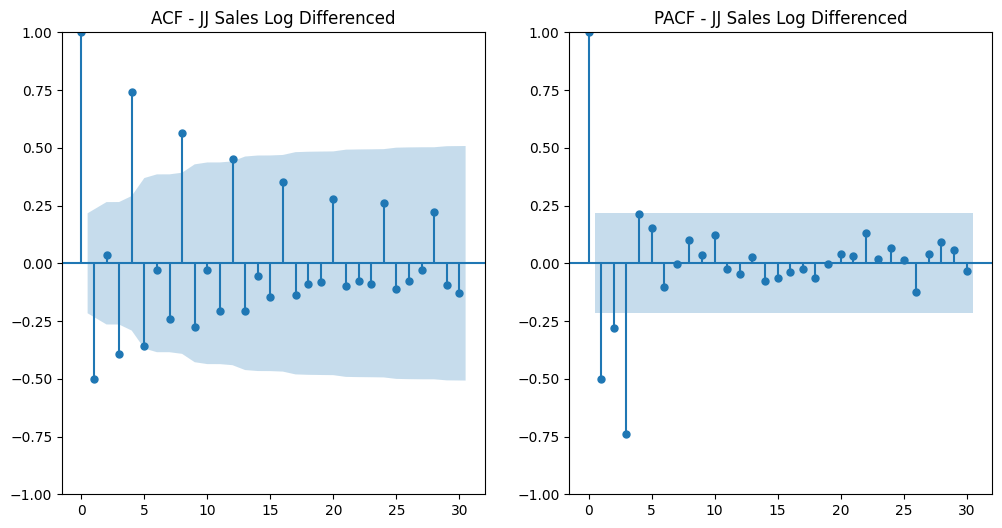

In [95]:
plot_acf_pacf(jj_data['data_tr_1'][1:], lags=30, title='JJ Sales Log Differenced')

**Amazon**

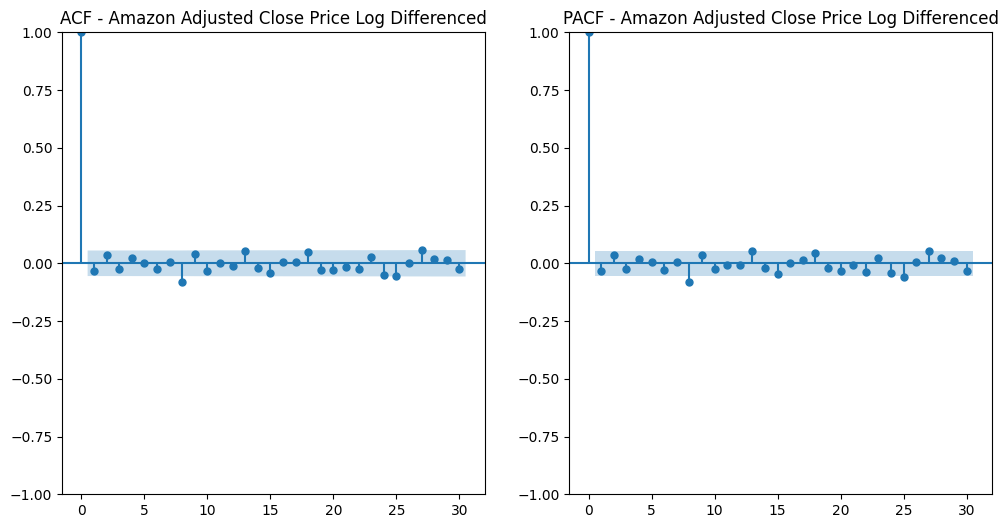

In [96]:
plot_acf_pacf(amzn_data['Adj_Close_tr_1'][1:], lags=30, title='Amazon Adjusted Close Price Log Differenced')

## **ARMA MODEL**

### **JJ**

In [97]:
# Fit ARIMA model
model_jj = ARIMA(jj_data['data'][1:], order=(3, 1, 3)).fit()
print(model_jj.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   82
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -75.510
Date:                Fri, 11 Apr 2025   AIC                            165.020
Time:                        02:52:01   BIC                            181.782
Sample:                             0   HQIC                           171.745
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0308      0.037    -28.081      0.000      -1.103      -0.959
ar.L2         -1.0269      0.044    -23.170      0.000      -1.114      -0.940
ar.L3         -0.9763      0.031    -31.121      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [98]:
def optimize_arima_jj(jj_series):
    results = []
    for p, q in product(range(0, 8), repeat=2):
        try:
            model = ARIMA(jj_series, order=(p, 1, q)).fit()
            results.append([(p, 1, q), model.aic])
        except:
            continue

    return pd.DataFrame(results, columns=['(p, d, q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)

In [99]:
result_df_jj = optimize_arima_jj(jj_data['data'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [100]:
print(result_df_jj)

    (p, d, q)         AIC
0   (6, 1, 3)  114.827905
1   (4, 1, 6)  115.778448
2   (7, 1, 1)  115.833455
3   (5, 1, 3)  116.288357
4   (5, 1, 2)  116.907790
..        ...         ...
59  (0, 1, 1)  263.328283
60  (0, 1, 3)  263.400449
61  (1, 1, 0)  264.465654
62  (2, 1, 0)  265.596913
63  (0, 1, 0)  293.444204

[64 rows x 2 columns]


In [101]:
best_model_fit_jj = ARIMA(jj_data['data'], order=(6, 1, 3)).fit()
print(best_model_fit_jj.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   83
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 -47.414
Date:                Fri, 11 Apr 2025   AIC                            114.828
Time:                        02:55:12   BIC                            138.895
Sample:                             0   HQIC                           124.491
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4684      0.143    -10.297      0.000      -1.748      -1.189
ar.L2         -0.7729      0.160     -4.832      0.000      -1.086      -0.459
ar.L3          0.0080      0.083      0.097      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Diagnostic Plots for jj sales


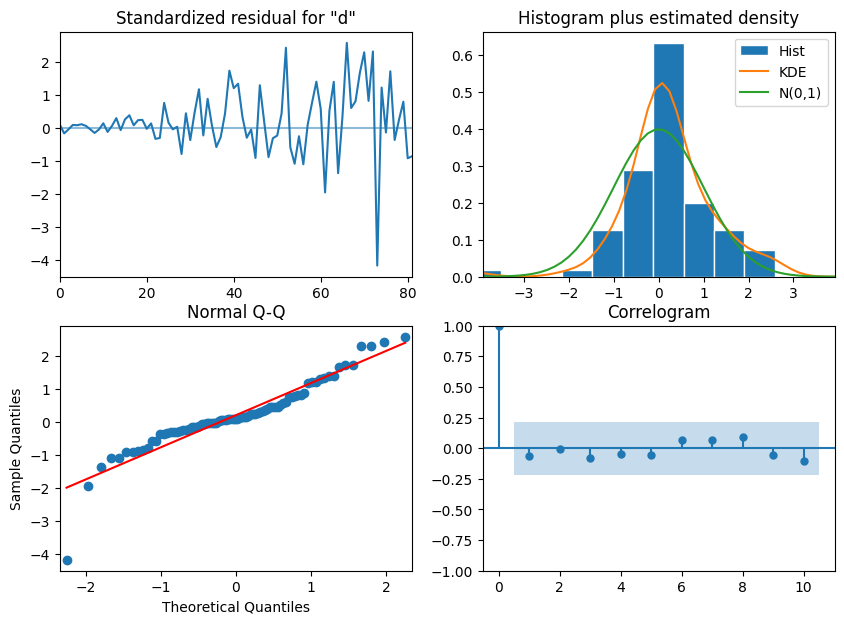

In [135]:
# Plot diagnostic output
print("\nDiagnostic Plots for jj sales")
best_model_fit_jj.plot_diagnostics(figsize=(10, 7))
plt.show()

In [109]:
test_data_jj = jj_data['data']
predictions_jj = best_model_fit_jj.predict(start=jj_data['data'].index[0], end=jj_data['data'].index[-1])
residuals_jj = jj_data['data'] - predictions_jj


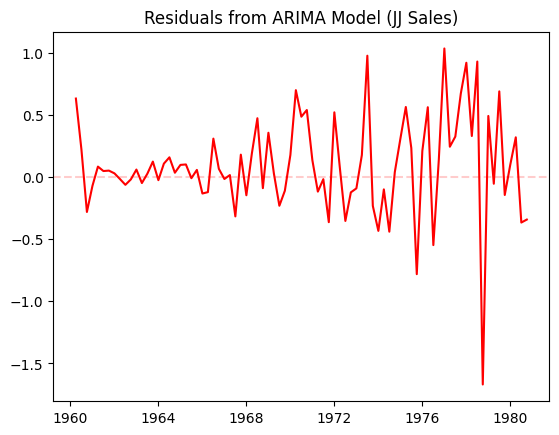

In [148]:
plt.plot(residuals_jj, color="red")
plt.title('Residuals from ARIMA Model (JJ Sales)')
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
plt.show()


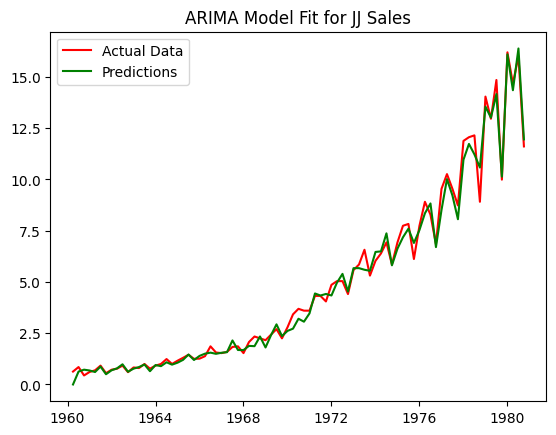

In [151]:
plt.plot(test_data_jj, label='Actual Data',color="red")
plt.plot(predictions_jj, label='Predictions',color="green")
plt.legend()
plt.title('ARIMA Model Fit for JJ Sales')
plt.show()

In [113]:
def calculate_forecast_metrics(forecast, actual):
    forecast, actual = np.array(forecast), np.array(actual)

    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))
    me = np.mean(forecast - actual)
    mae = np.mean(np.abs(forecast - actual))
    mpe = np.mean((forecast - actual) / actual)
    rmse = np.sqrt(np.mean((forecast - actual)**2))
    corr = np.corrcoef(forecast, actual)[0, 1]

    mins = np.minimum(forecast, actual)
    maxs = np.maximum(forecast, actual)
    minmax = 1 - np.mean(mins / maxs)

    return {'mape': mape, 'me': me, 'mae': mae, 'mpe': mpe, 'rmse': rmse, 'corr': corr, 'minmax': minmax}


In [114]:
metrics = calculate_forecast_metrics(predictions_jj, test_data_jj)
print(metrics)

{'mape': np.float64(0.08758615841454676), 'me': np.float64(-0.08876784778047297), 'mae': np.float64(0.27943117448191823), 'mpe': np.float64(-0.026836298630820755), 'rmse': np.float64(0.404360859372728), 'corr': np.float64(0.9957741777084571), 'minmax': np.float64(0.08263887257952995)}


In [116]:
def plot_forecast(model_fit, data, n_forecast=24, col='data'):
    # Get forecast and confidence intervals
    forecast = model_fit.get_forecast(steps=n_forecast)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[col], label='Observed', color='red')
    plt.plot(forecast_index, forecast_mean, label='Forecast', color='blue', linestyle='--')
    plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
    plt.title('Sales Forecast with Confidence Interval')
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-116-9bc59aba46f1>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')


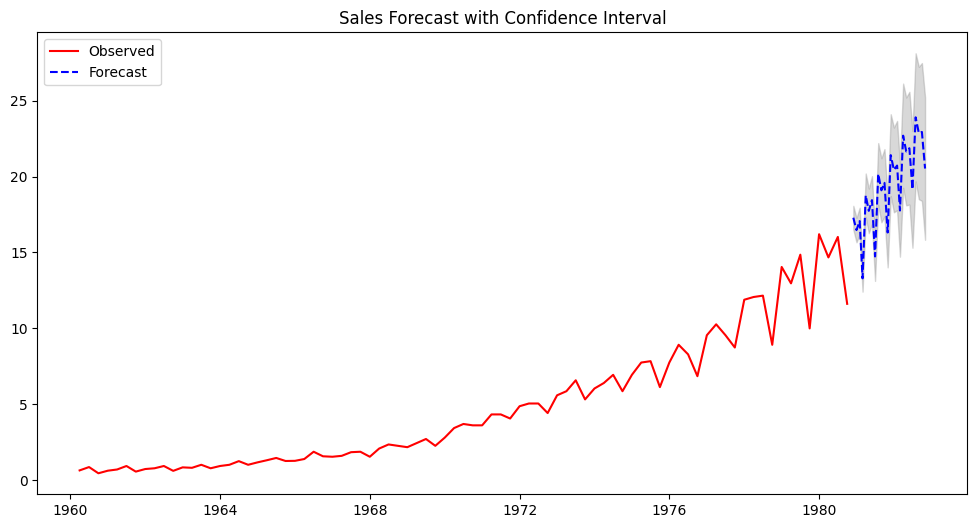

In [117]:
plot_forecast(best_model_fit_jj, jj_data, n_forecast=24, col='data')

In [120]:
# make the predictions
predictions= best_model_fit_jj.get_forecast(steps=26)
predictions.predicted_mean

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
83,17.286973
84,16.472250
85,17.067079
86,13.290768
87,18.758861
88,17.738136
89,18.447864
90,14.732522
91,20.172471
92,19.095322


In [123]:
predictions.conf_int()

,lower data,upper data
83,16.504118,18.069828
84,15.666532,17.277969
85,16.189035,17.945123
86,12.411410,14.170126
87,17.315873,20.201849
88,16.267431,19.208842
89,16.869348,20.026381
90,13.120721,16.344322
91,18.138995,22.205946
92,16.983714,21.206929


In [125]:
conf_df = pd.concat([predictions.predicted_mean,
predictions.conf_int()], axis = 1)

conf_df.head()

,predicted_mean,lower data,upper data
83,17.286973,16.504118,18.069828
84,16.472250,15.666532,17.277969
85,17.067079,16.189035,17.945123
86,13.290768,12.411410,14.170126
87,18.758861,17.315873,20.201849


In [129]:
def plot_forecast_with_confidence_interval(model_fit, data, n_forecast=24, col='data'):
    forecast_obj = model_fit.get_forecast(steps=n_forecast)
    forecast_mean = forecast_obj.predicted_mean
    forecast_ci = forecast_obj.conf_int()

    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')

    # Create DataFrame for forecast and confidence intervals
    conf_df = pd.DataFrame({
        'Forecast': forecast_mean.values,
        'Lower CI': forecast_ci.iloc[:, 0].values,
        'Upper CI': forecast_ci.iloc[:, 1].values
    }, index=forecast_index)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(data[col], label='Actual', color='blue')
    plt.plot(conf_df['Forecast'], label='Forecast', color='red', linestyle='--')
    plt.fill_between(conf_df.index, conf_df['Lower CI'], conf_df['Upper CI'], color='gray', alpha=0.3)
    plt.title('Sales Forecast with Confidence Interval')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-127-e3dfb74884f2>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')


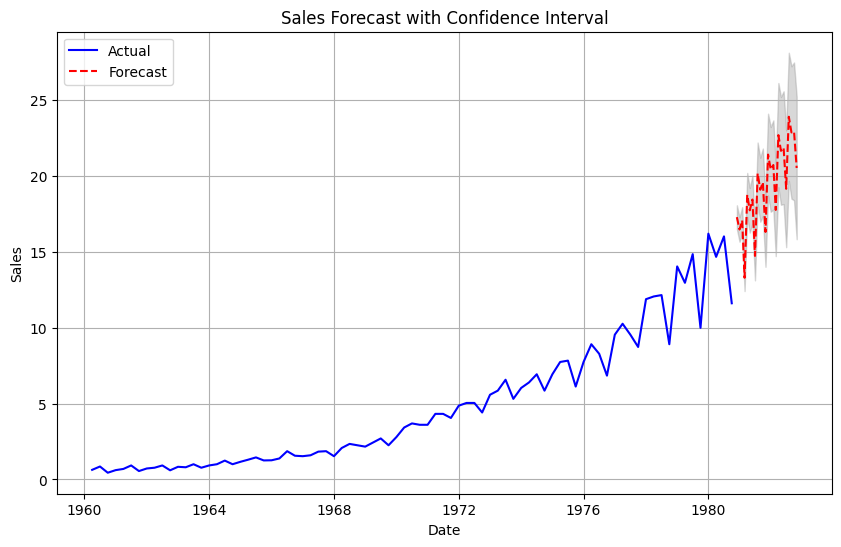

In [128]:
plot_forecast_with_confidence_interval(best_model_fit_jj, jj_data, n_forecast=24, col='data')

### **Amazon**

In [130]:
# Fit ARIMA model
model_amzn = ARIMA(amzn_data['Close'][1:], order=(3, 1, 3)).fit()
print(model_amzn.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1257
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3051.807
Date:                Fri, 11 Apr 2025   AIC                           6117.615
Time:                        03:40:54   BIC                           6153.565
Sample:                             0   HQIC                          6131.126
                               - 1257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7246      0.053    -13.783      0.000      -0.828      -0.622
ar.L2          0.6798      0.085      7.960      0.000       0.512       0.847
ar.L3          0.9265      0.050     18.385      0.0

In [131]:
def optimize_arima_amzn(jj_series):
    results = []
    for p, q in product(range(0, 8), repeat=2):
        try:
            model = ARIMA(jj_series, order=(p, 1, q)).fit()
            results.append([(p, 1, q), model.aic])
        except:
            continue

    return pd.DataFrame(results, columns=['(p, d, q)', 'AIC']).sort_values(by='AIC').reset_index(drop=True)

In [132]:
result_df_amzn = optimize_arima_amzn(amzn_data['Close'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [133]:
print(result_df_amzn)

    (p, d, q)          AIC
0   (2, 1, 2)  6118.418966
1   (3, 1, 2)  6120.143930
2   (2, 1, 3)  6120.148540
3   (3, 1, 3)  6121.488913
4   (4, 1, 2)  6122.056430
..        ...          ...
59  (7, 1, 3)  6134.286507
60  (0, 1, 7)  6134.427323
61  (4, 1, 7)  6134.602900
62  (7, 1, 0)  6134.640642
63  (7, 1, 7)  6135.633220

[64 rows x 2 columns]


In [134]:
best_model_fit_amzn= ARIMA(amzn_data['Close'], order=(2, 1, 2)).fit()
print(best_model_fit_amzn.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3054.209
Date:                Fri, 11 Apr 2025   AIC                           6118.419
Time:                        03:46:02   BIC                           6144.101
Sample:                             0   HQIC                          6128.071
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6947      0.015   -112.031      0.000      -1.724      -1.665
ar.L2         -0.9605      0.015    -64.838      0.000      -0.990      -0.931
ma.L1          1.6973      0.011    152.548      0.0


Diagnostic Plots for Amazon prices:


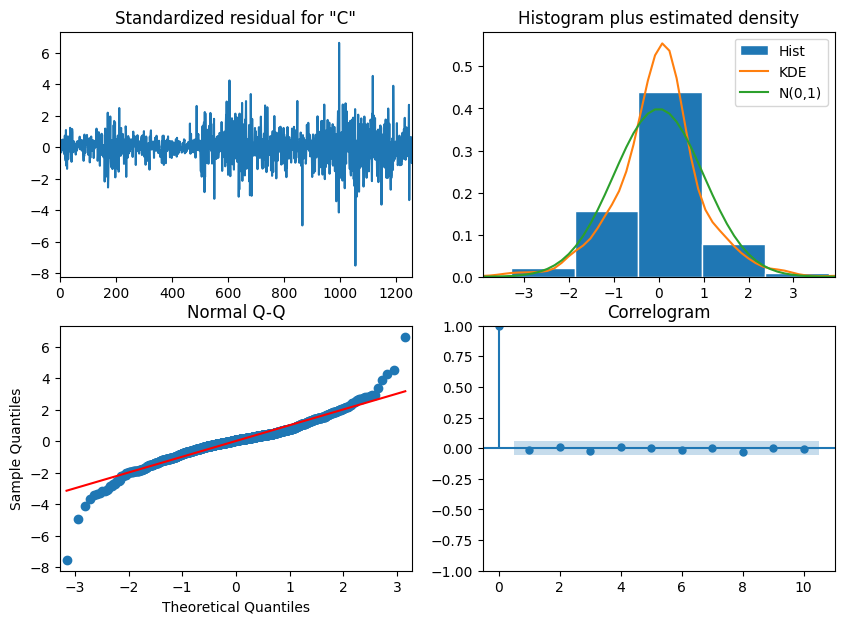

In [136]:
# Plot diagnostic output
print("\nDiagnostic Plots for Amazon prices:")
best_model_fit_amzn.plot_diagnostics(figsize=(10, 7))
plt.show()

In [138]:
test_data_amzn = amzn_data['Close']
predictions_amzn = best_model_fit_amzn.predict(start=amzn_data['Close'].index[0], end=amzn_data['Close'].index[-1])
residuals_amzn = amzn_data['Close'] - predictions_amzn


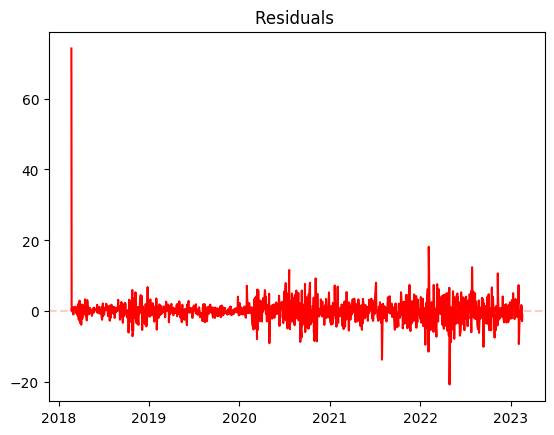

In [145]:
plt.plot(residuals_amzn, color="red")
plt.title('Residuals ')
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
plt.show()


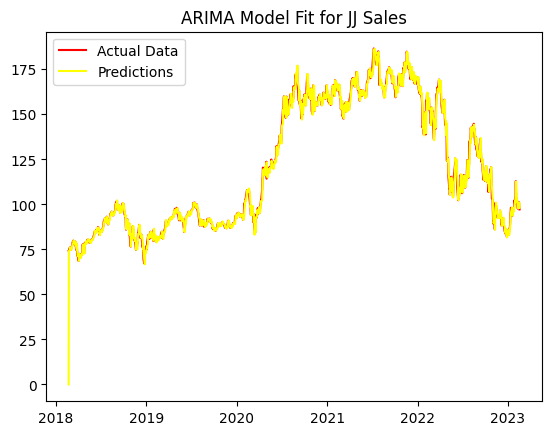

In [146]:
plt.plot(test_data_amzn, label='Actual Data', color="red")
plt.plot(predictions_amzn, label='Predictions', color="yellow")
plt.legend()
plt.title('ARIMA Model Fit for JJ Sales')
plt.show()

In [152]:
def calculate_forecast_metrics(forecast, actual):
    forecast, actual = np.array(forecast), np.array(actual)

    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))
    me = np.mean(forecast - actual)
    mae = np.mean(np.abs(forecast - actual))
    mpe = np.mean((forecast - actual) / actual)
    rmse = np.sqrt(np.mean((forecast - actual)**2))
    corr = np.corrcoef(forecast, actual)[0, 1]

    mins = np.minimum(forecast, actual)
    maxs = np.maximum(forecast, actual)
    minmax = 1 - np.mean(mins / maxs)

    return {'mape': mape, 'me': me, 'mae': mae, 'mpe': mpe, 'rmse': rmse, 'corr': corr, 'minmax': minmax}


In [153]:
metrics = calculate_forecast_metrics(predictions_amzn, test_data_amzn)
print(metrics)

{'mape': np.float64(0.016937708074099184), 'me': np.float64(-0.077140009939115), 'mae': np.float64(1.9777162968437034), 'mpe': np.float64(-0.00075253271836936), 'rmse': np.float64(3.4514508920469193), 'corr': np.float64(0.9950979470386971), 'minmax': np.float64(0.01667284917089784)}


In [156]:
def plot_forecast(model_fit, data, n_forecast=24, col='data'):
    # Get forecast and confidence intervals
    forecast = model_fit.get_forecast(steps=n_forecast)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[col], label='Observed', color='red')
    plt.plot(forecast_index, forecast_mean, label='Forecast', color='green', linestyle='--')
    plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
    plt.title('Sales Forecast with Confidence Interval')
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-156-491a8e1c8db9>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')


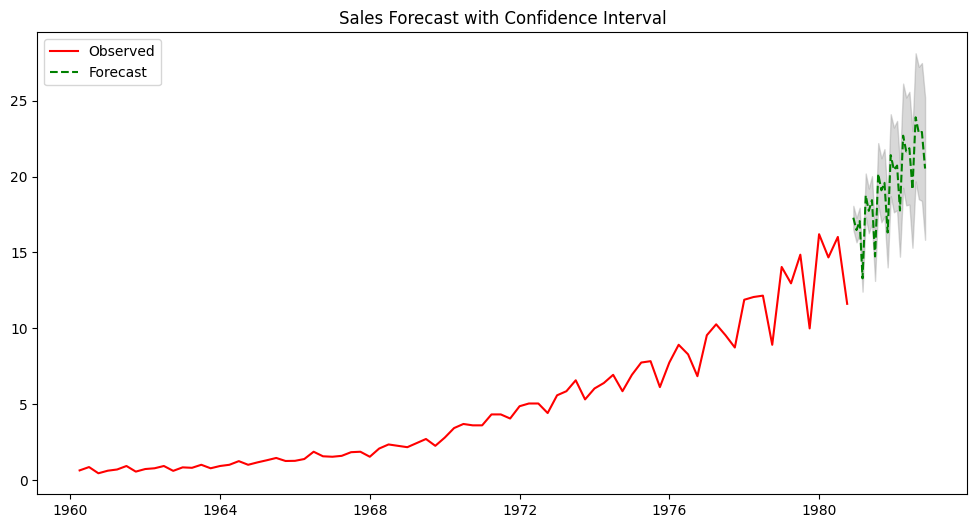

In [157]:
plot_forecast(best_model_fit_jj, jj_data, n_forecast=24, col='data')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-156-491a8e1c8db9>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')


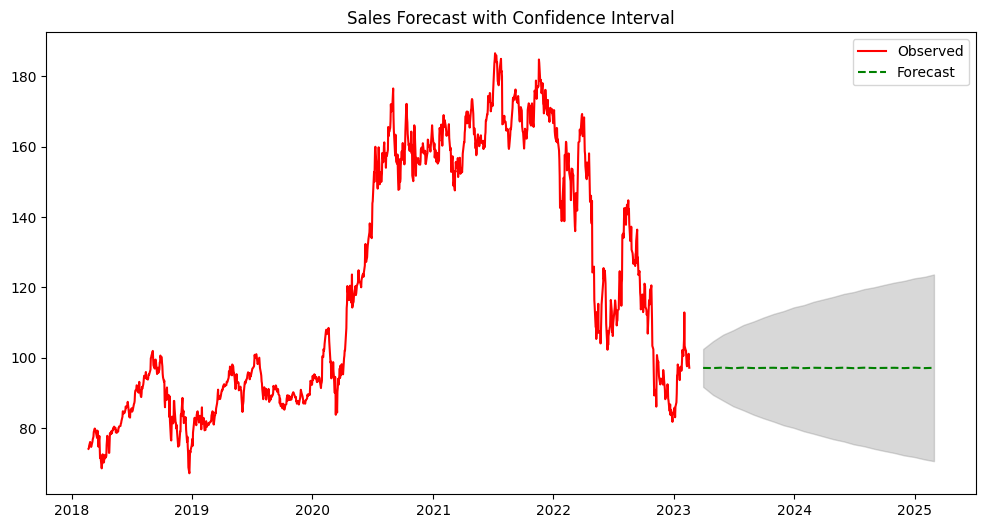

In [159]:
plot_forecast(best_model_fit_amzn, amzn_data, n_forecast=24, col='Close')

In [160]:
# make the predictions
predictions_int = best_model_fit_amzn.get_forecast(steps=26)
predictions_int.predicted_mean

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
1258,97.138828
1259,97.100133
1260,97.224464
1261,97.050929
1262,97.225595
1263,97.096273
1264,97.147663
1265,97.184790
1266,97.072510
1267,97.227128


In [161]:
predictions_int.conf_int()

,lower Close,upper Close
1258,91.754267,102.523390
1259,89.475377,104.724888
1260,87.839046,106.609882
1261,86.255858,107.845999
1262,85.111110,109.340080
1263,83.851846,110.340701
1264,82.829236,111.466090
1265,81.870910,112.498670
1266,80.846665,113.298355
1267,80.098412,114.355845


In [162]:
conf_df = pd.concat([predictions_int.predicted_mean,
predictions_int.conf_int()], axis = 1)

conf_df.head()

,predicted_mean,lower Close,upper Close
1258,97.138828,91.754267,102.523390
1259,97.100133,89.475377,104.724888
1260,97.224464,87.839046,106.609882
1261,97.050929,86.255858,107.845999
1262,97.225595,85.111110,109.340080


In [163]:
def plot_forecast_with_confidence_interval(model_fit, data, n_forecast=24, col='data'):

    forecast_obj = model_fit.get_forecast(steps=n_forecast)
    forecast_mean = forecast_obj.predicted_mean
    forecast_ci = forecast_obj.conf_int()

    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')

    conf_df = pd.DataFrame({
        'Predictions': forecast_mean.values,
        'Lower CI': forecast_ci.iloc[:, 0].values,
        'Upper CI': forecast_ci.iloc[:, 1].values
    }, index=forecast_index)

    fig, ax = plt.subplots(figsize=(10, 6), dpi=144)
    ax.plot(data[col], 'b', label='Actual')

    conf_df['Predictions'].plot(ax=ax, color='red', label='Forecast')
    conf_df['Upper CI'].plot(ax=ax, color='grey', alpha=0.3, label='Upper CI')
    conf_df['Lower CI'].plot(ax=ax, color='grey', alpha=0.3, label='Lower CI')

    ax.fill_between(conf_df.index, conf_df['Lower CI'], conf_df['Upper CI'], color='grey', alpha=0.2)

    # Final plot settings
    ax.set_title('Sales Forecast with Confidence Interval', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Sales', fontsize=12)
    ax.legend(loc='upper left', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-163-f8ceb99e3c9d>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


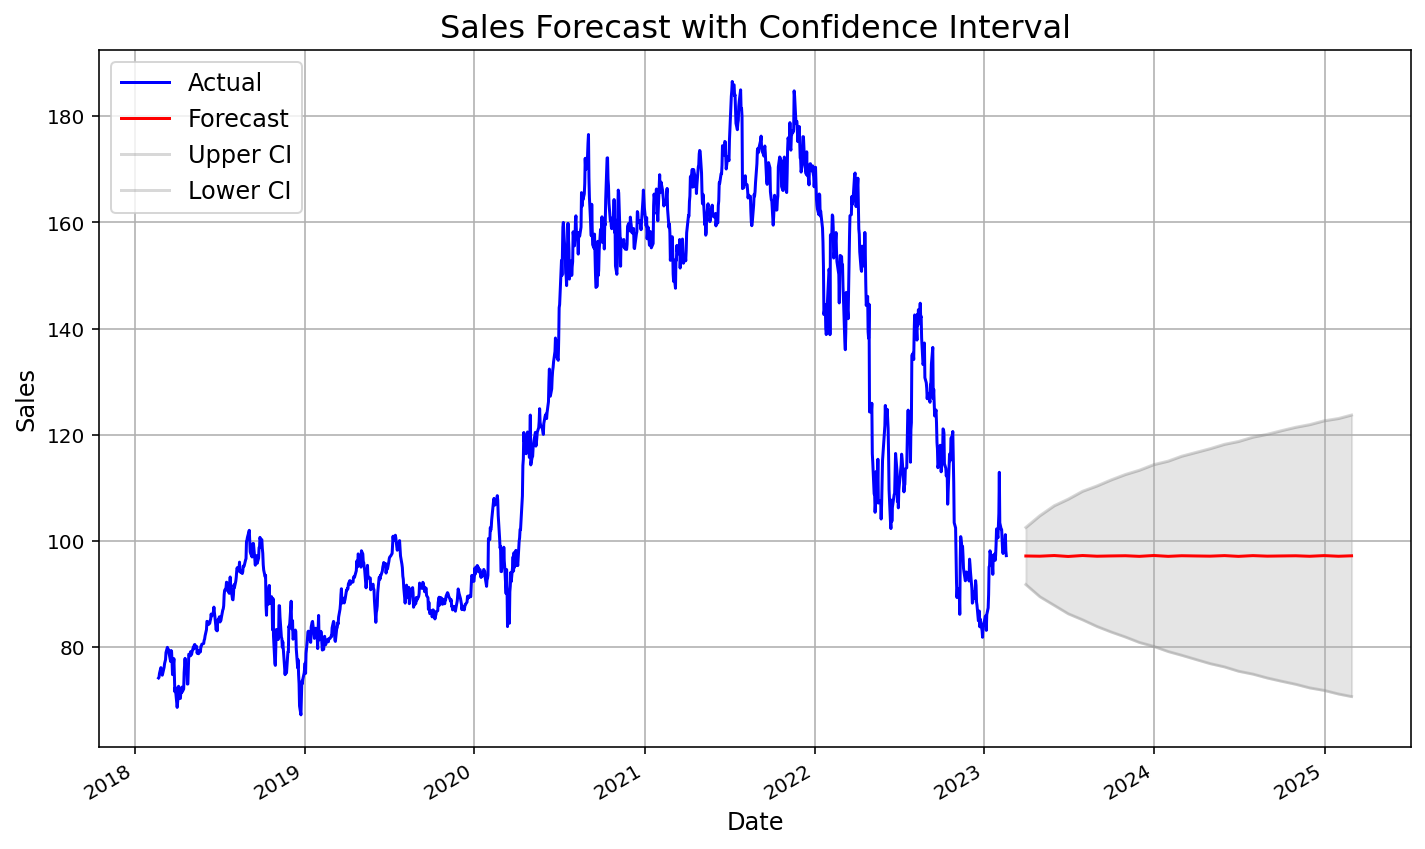

In [164]:
plot_forecast_with_confidence_interval(best_model_fit_amzn, amzn_data, n_forecast=24, col='Close')

## **NEURAL NETWORK**

### LSTM

In [166]:
def to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = DataFrame(data)
    cols = [df.shift(i) for i in range(n_in, 0, -1)] + [df.shift(-i) for i in range(n_out)]
    names = [f'var{j+1}(t-{i})' for i in range(n_in, 0, -1) for j in range(df.shape[1])] + \
            [f'var{j+1}(t+{i})' for i in range(n_out) for j in range(df.shape[1])]

    result = concat(cols, axis=1)
    result.columns = names

    if dropnan:
        result.dropna(inplace=True)

    return result

In [167]:
def evaluate_forecast(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(((y_true - y_pred) ** 2).mean())
    mae = np.abs(y_true - y_pred).mean()
    mape = (np.abs((y_true - y_pred) / y_true)).mean() * 100
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}


In [172]:
#Train the LSTM Model
def train_rnn_model(df, column='data', model_type='LSTM', n_input=12):
    series = df[[column]].copy()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series)

    reframed = to_supervised(scaled, n_in=n_input, n_out=1)
    values = reframed.values

    X, y = values[:, :-1], values[:, -1]
    X = X.reshape((X.shape[0], n_input, 1))

    # Split
    train_size = int(len(X) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]

    # Build model
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    elif model_type == 'GRU':
        model.add(GRU(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')

    # Train model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred,)*1, axis=1))[:,0]
    y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1),)*1, axis=1))[:,0]

    return model, X, y, scaler, y_test_inv, y_pred_inv

In [179]:
def forecast_rnn(model, X, n_forecast=24, n_input=12):

    future_input = X[-1].reshape(1, n_input, 1)
    forecast_scaled = []
    for _ in range(n_forecast):
        next_val = model.predict(future_input)[0, 0]
        forecast_scaled.append(next_val)
        future_input = np.append(future_input[:, 1:, :], [[[next_val]]], axis=1)

    future_forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()

    return future_forecast

future_forecast = forecast_rnn(model, X, n_forecast=24)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


**JJ**

In [182]:
model, X, y, scaler, y_test_inv, y_pred_inv = train_rnn_model(jj_data, column='data', model_type='LSTM')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


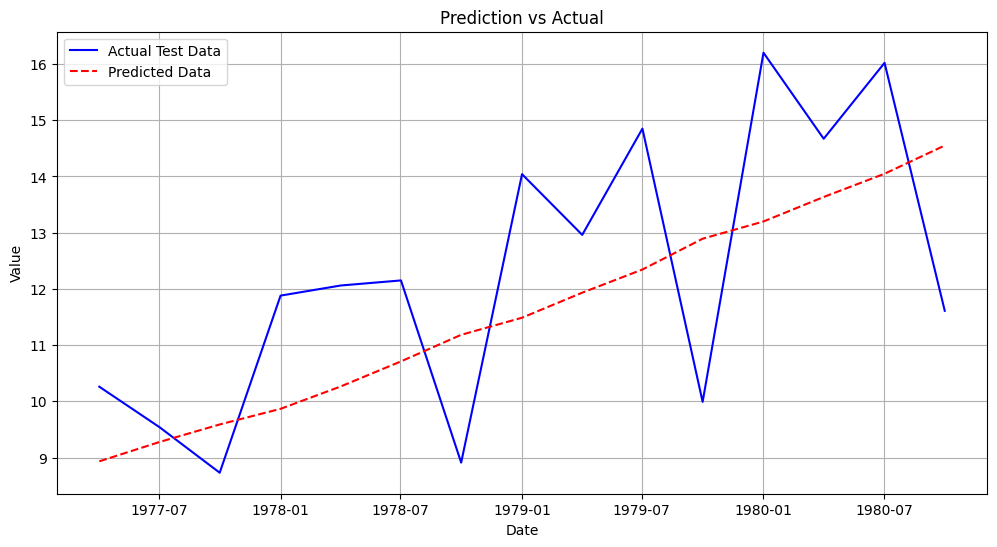

In [183]:
# Plot Actual vs Predicted for Test Set
plt.figure(figsize=(12, 6))
plt.plot(jj_data.index[-len(y_test_inv):], y_test_inv, label='Actual Test Data', color='blue')
plt.plot(jj_data.index[-len(y_pred_inv):], y_pred_inv, label='Predicted Data', color='red', linestyle='--')
plt.title('Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


<ipython-input-180-1e6f67358b85>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')


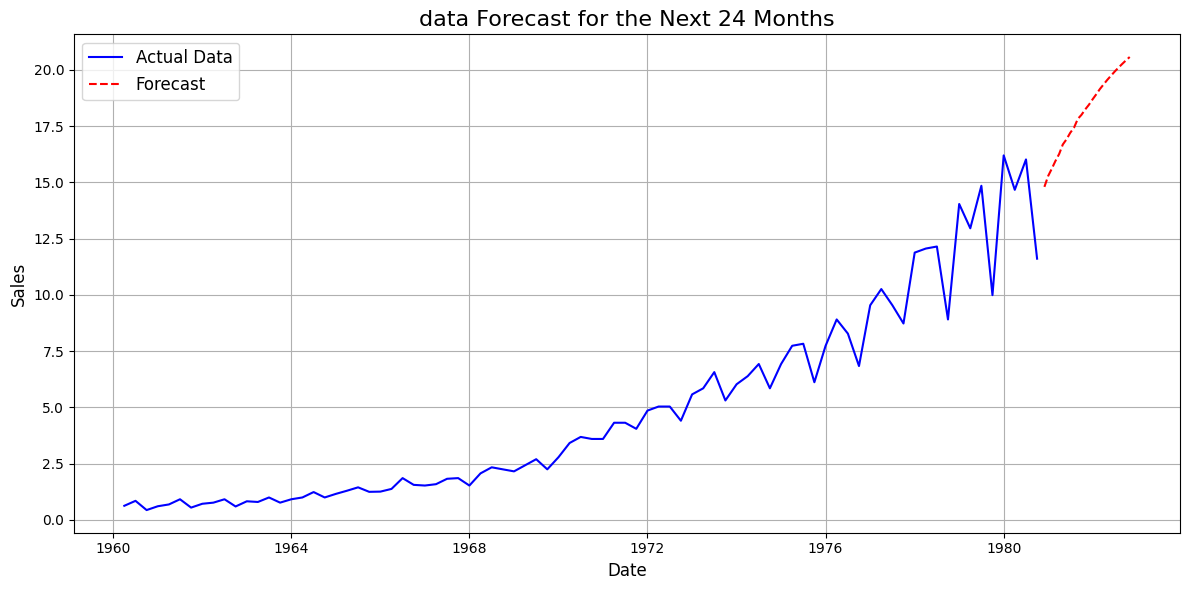

In [181]:
def plot_forecast(model, X, df, n_forecast=24, n_input=12, column='data'):

    future_forecast = forecast_rnn(model, X, n_forecast, n_input)
    last_date = df.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column], label='Actual Data', color='blue')
    plt.plot(forecast_index, future_forecast, label='Forecast', color='red', linestyle='--')
    plt.title(f'{column} Forecast for the Next {n_forecast} Months', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_forecast(model, X, jj_data, n_forecast=24)

In [195]:
# Evaluate JJ Data
metrics_jj = evaluate_forecast(y_test_inv, y_pred_inv)
print("Forecast Evaluation Metrics:")
for k, v in metrics_jj.items():
    print(f'{k}: {v:.4f}')

Forecast Evaluation Metrics:
RMSE: 4.4663
MAE: 3.5260
MAPE: 3.0262


**Amazon**

In [191]:
model_amzn, X_amzn, y_amzn, scaler_amzn, y_test_inv_amzn, y_pred_inv_amzn = train_rnn_model(amzn_data, column='Close', model_type='LSTM')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


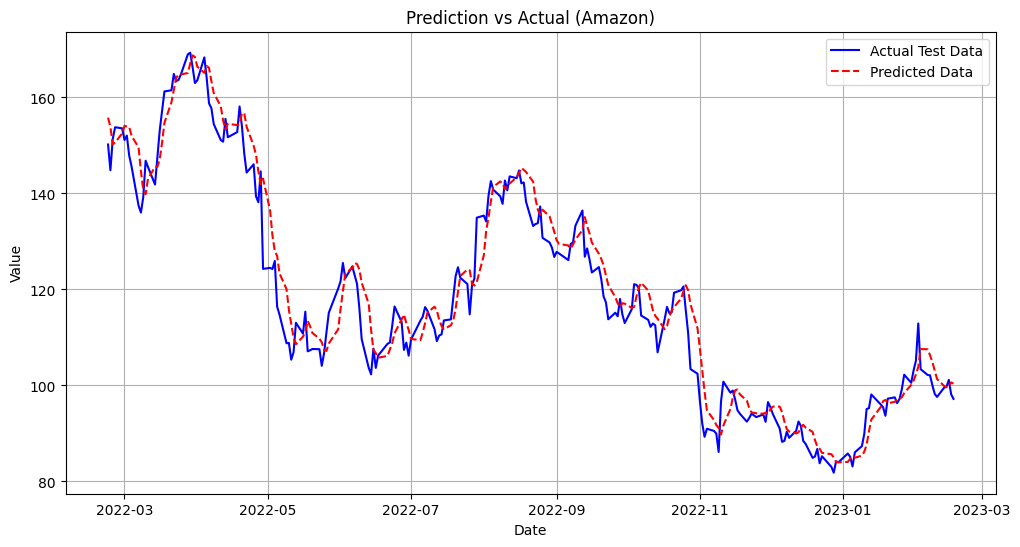

In [192]:
# Plot Actual vs Predicted for Amazon Test Set
plt.figure(figsize=(12, 6))
plt.plot(amzn_data.index[-len(y_test_inv_amzn):], y_test_inv_amzn, label='Actual Test Data', color='blue')
plt.plot(amzn_data.index[-len(y_pred_inv_amzn):], y_pred_inv_amzn, label='Predicted Data', color='red', linestyle='--')
plt.title('Prediction vs Actual (Amazon)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


<ipython-input-187-5c9458c9f74b>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')


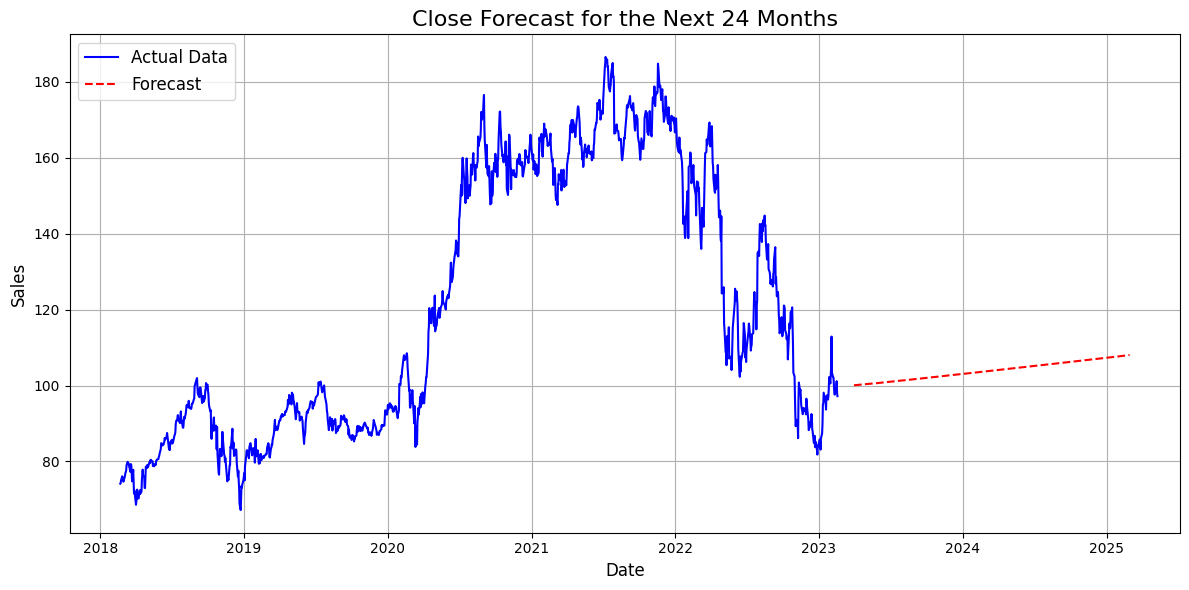

In [187]:
# Plot Forecast with Confidence Interval
def plot_forecast(model, X, df, n_forecast=24, n_input=12, column='Close'):
    future_forecast = forecast_rnn(model, X, n_forecast, n_input)
    last_date = df.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')

    # Plotting the actual data and the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column], label='Actual Data', color='blue')
    plt.plot(forecast_index, future_forecast, label='Forecast', color='red', linestyle='--')
    plt.title(f'{column} Forecast for the Next {n_forecast} Months', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_forecast(model, X, amzn_data, n_forecast=24)

In [196]:
# Evaluate Amazon Data
metrics_amzn = evaluate_forecast(y_test_inv_amzn, y_pred_inv_amzn)
print("\nForecast Evaluation Metrics:")
for k, v in metrics_amzn.items():
    print(f'{k}: {v:.4f}')


Forecast Evaluation Metrics:
RMSE: 5.0428
MAE: 3.9824
MAPE: 3.4252
